# Project 1: Exploratory Data Analysis

Things to uncover:
* Is case fatality rate higher in lower income neighborhoods in the states?

Useful links:
* COVID19 sociodemographic & socioeconmic factors research paper: https://www150.statcan.gc.ca/n1/daily-quotidien/220308/dq220308d-eng.htm#:~:text=The%20relationship%20between%20low%20income,in%20COVID%2D19%20mortality.
* Detailed income and employment statistics by state, county, and metropolitan area: https://apps.bea.gov/api/_pdf/bea_web_service_api_user_guide.pdf
* More information on factors of covid-19: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7221360/


## Analysis by County

In [1]:
# Importing dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy as sp
import pprint
import hvplot.pandas
import json
import matplotlib.patches as mpatches

# Importing api keys
from api_keys import BEA_api_key
from state_abbrevs import us_state_to_abbrev
from api_keys import census_api_key

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

### Data Import  & Clean-Up

In [2]:
averageIncome_df = pd.read_csv('averageIncome_2021_adjusted.csv').drop(['Unnamed: 0'], axis = 1)
averageIncome_df

,"County, State",fips,TimePeriod,CL_UNIT,DataValue
0,"Autauga, AL",1001,2021,Dollars,"48,347"
1,"Baldwin, AL",1003,2021,Dollars,"54,659"
2,"Barbour, AL",1005,2021,Dollars,"40,428"
3,"Bibb, AL",1007,2021,Dollars,"36,892"
4,"Blount, AL",1009,2021,Dollars,"42,634"
...,...,...,...,...,...
3135,"Sweetwater, WY",56037,2021,Dollars,"56,934"
3136,"Teton, WY",56039,2021,Dollars,"318,297"
3137,"Uinta, WY",56041,2021,Dollars,"44,157"
3138,"Washakie, WY",56043,2021,Dollars,"60,235"


In [3]:
cleaned_averageIncome_df = averageIncome_df[averageIncome_df.DataValue != '(NA)']
cleaned_averageIncome_df

,"County, State",fips,TimePeriod,CL_UNIT,DataValue
0,"Autauga, AL",1001,2021,Dollars,"48,347"
1,"Baldwin, AL",1003,2021,Dollars,"54,659"
2,"Barbour, AL",1005,2021,Dollars,"40,428"
3,"Bibb, AL",1007,2021,Dollars,"36,892"
4,"Blount, AL",1009,2021,Dollars,"42,634"
...,...,...,...,...,...
3135,"Sweetwater, WY",56037,2021,Dollars,"56,934"
3136,"Teton, WY",56039,2021,Dollars,"318,297"
3137,"Uinta, WY",56041,2021,Dollars,"44,157"
3138,"Washakie, WY",56043,2021,Dollars,"60,235"


In [4]:
splitting_location_income = (cleaned_averageIncome_df['County, State'].str.split(", ", expand = True)).rename(columns = {0 : 'County', 1: 'State'})
splitting_location_income

,County,State,2
0,Autauga,AL,None
1,Baldwin,AL,None
2,Barbour,AL,None
3,Bibb,AL,None
4,Blount,AL,None
...,...,...,...
3135,Sweetwater,WY,None
3136,Teton,WY,None
3137,Uinta,WY,None
3138,Washakie,WY,None


In [5]:
income_by_county_df = (splitting_location_income.join(cleaned_averageIncome_df)).iloc[:,[0,1,7]]
income_by_county_df

,County,State,DataValue
0,Autauga,AL,"48,347"
1,Baldwin,AL,"54,659"
2,Barbour,AL,"40,428"
3,Bibb,AL,"36,892"
4,Blount,AL,"42,634"
...,...,...,...
3135,Sweetwater,WY,"56,934"
3136,Teton,WY,"318,297"
3137,Uinta,WY,"44,157"
3138,Washakie,WY,"60,235"


In [6]:
income_by_county_df.iloc[:,2] = (income_by_county_df.iloc[:,2].replace(',','', regex=True)).values.astype(int)
income_by_county_df

,County,State,DataValue
0,Autauga,AL,48347
1,Baldwin,AL,54659
2,Barbour,AL,40428
3,Bibb,AL,36892
4,Blount,AL,42634
...,...,...,...
3135,Sweetwater,WY,56934
3136,Teton,WY,318297
3137,Uinta,WY,44157
3138,Washakie,WY,60235


### Income Analysis by County

In [7]:
top_10_county_income = income_by_county_df.sort_values('DataValue', ascending=False).head(10)
top_10_county_income

,County,State,DataValue
3136,Teton,WY,318297
319,Pitkin,CO,198939
1883,New York,NY,195543
2823,Summit,UT,183972
232,Marin,CA,164118
249,San Francisco,CA,160749
252,San Mateo,CA,160485
72,Bristol Bay Borough,AK,155155
254,Santa Clara,CA,138724
2449,Union,SD,134811


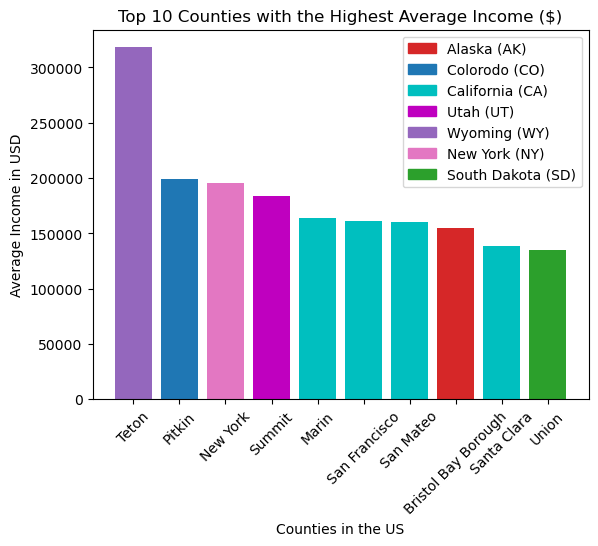

In [8]:
fig, top_counties_income_ax = plt.subplots()

top_counties = top_10_county_income['County']
top_counties_income = top_10_county_income['DataValue']
bar_labels = top_10_county_income['State']

# Creating the legend manually
purple_patch = mpatches.Patch(color='tab:purple', label='Wyoming (WY)')
pink_patch = mpatches.Patch(color='tab:pink', label='New York (NY)')
blue_patch = mpatches.Patch(color='tab:blue', label='Colorodo (CO)')
c_patch = mpatches.Patch(color='c', label='California (CA)')
m_patch = mpatches.Patch(color='m', label='Utah (UT)')
red_patch = mpatches.Patch(color='tab:red', label='Alaska (AK)')
green_patch = mpatches.Patch(color='tab:green', label='South Dakota (SD)')

patches = [red_patch, blue_patch, c_patch, m_patch, purple_patch, pink_patch, green_patch]   

bar_colors = ['tab:purple','tab:blue','tab:pink','m','c','c','c','tab:red', 'c', 'tab:green']
     
top_counties_income_ax.bar(top_counties, top_counties_income, label=bar_labels, color=bar_colors)

top_counties_income_ax.set_ylabel('Average Income in USD')
top_counties_income_ax.set_xlabel('Counties in the US')
top_counties_income_ax.set_title('Top 10 Counties with the Highest Average Income ($)')
top_counties_income_ax.legend(handles=patches)
plt.xticks(rotation = 45)

plt.savefig('images\Top 10 Counties with the Highest Average Income ($).png')
plt.show()

In [9]:
bottom_10_county_income = income_by_county_df.sort_values('DataValue', ascending=True).head(10)
bottom_10_county_income

,County,State,DataValue
565,Wheeler,GA,24241
283,Crowley,CO,24314
408,Union,FL,25293
608,Madison,ID,25648
2500,Lake,TN,29534
1049,Elliott,KY,29572
2295,Forest,PA,29573
2452,Ziebach,SD,30532
546,Telfair,GA,30573
436,Charlton,GA,30916


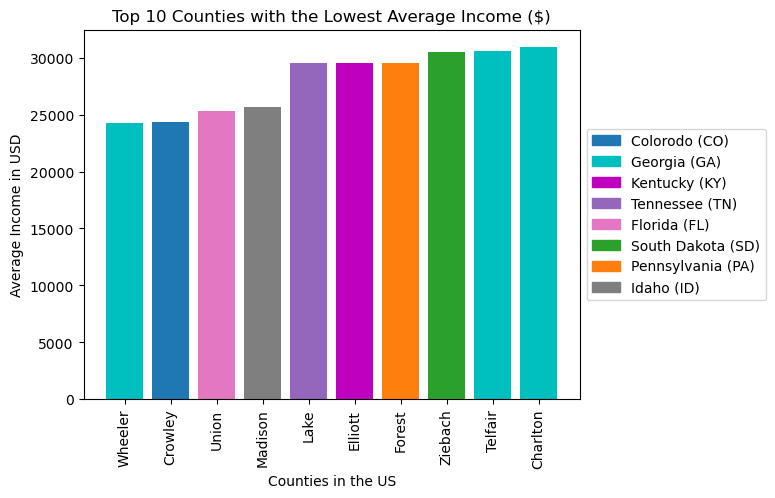

In [10]:
fig, bottom_counties_income_ax = plt.subplots()

bottom_counties = bottom_10_county_income['County']
bottom_counties_income = bottom_10_county_income['DataValue']
bar_labels = bottom_10_county_income['State']

# Creating the legend manually
c_patch = mpatches.Patch(color='c', label='Georgia (GA)')
blue_patch = mpatches.Patch(color='tab:blue', label='Colorodo (CO)')
green_patch = mpatches.Patch(color='tab:green', label='South Dakota (SD)')
m_patch = mpatches.Patch(color='m', label='Kentucky (KY)')
purple_patch = mpatches.Patch(color='tab:purple', label='Tennessee (TN)')
pink_patch = mpatches.Patch(color='tab:pink', label='Florida (FL)')
orange_patch = mpatches.Patch(color='tab:orange', label='Pennsylvania (PA)')
gray_patch = mpatches.Patch(color='tab:gray', label='Idaho (ID)')

patches = [blue_patch, c_patch, m_patch, purple_patch, pink_patch, green_patch, orange_patch, gray_patch]   

bar_colors = ['c','tab:blue','tab:pink','tab:gray','tab:purple','m','tab:orange','tab:green', 'c', 'c']

bottom_counties_income_ax.bar(bottom_counties, bottom_counties_income, label=bar_labels, color=bar_colors)

bottom_counties_income_ax.set_ylabel('Average Income in USD')
bottom_counties_income_ax.set_xlabel('Counties in the US')
bottom_counties_income_ax.set_title('Top 10 Counties with the Lowest Average Income ($)')
bottom_counties_income_ax.legend(handles=patches, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation = 90)

plt.savefig('images\Top 10 Counties with the Lowest Average Income ($).png')
plt.show()

### COVID-19 Data Analysis by County

In [11]:
COVID19_metrics_df = pd.read_csv('us-counties-2021.csv')

In [12]:
COVID19_metrics_df.iloc[:,3] = COVID19_metrics_df.iloc[:,3].values.astype(int)
cumulative_COVID19_metrics_df = COVID19_metrics_df[COVID19_metrics_df['date'] == '2021-12-31']
abbreviated_COVID19_metrics_df = cumulative_COVID19_metrics_df.replace({'state': us_state_to_abbrev})
cleaned_COVID19_metrics_df = abbreviated_COVID19_metrics_df.loc[(abbreviated_COVID19_metrics_df["state"] != 'PR')]
CFR_metric_df = (cleaned_COVID19_metrics_df.dropna())[cleaned_COVID19_metrics_df.fips > 0]
CFR_metric_df

,date,county,state,fips,cases,deaths
1182122,2021-12-31,Autauga,AL,1001,11018,160.0
1182123,2021-12-31,Baldwin,AL,1003,39911,593.0
1182124,2021-12-31,Barbour,AL,1005,3860,81.0
1182125,2021-12-31,Bibb,AL,1007,4533,95.0
1182126,2021-12-31,Blount,AL,1009,11256,198.0
...,...,...,...,...,...,...
1185368,2021-12-31,Sweetwater,WY,56037,8320,107.0
1185369,2021-12-31,Teton,WY,56039,5950,14.0
1185370,2021-12-31,Uinta,WY,56041,4154,31.0
1185371,2021-12-31,Washakie,WY,56043,1879,37.0


In [13]:
county_CFR_metric_df = CFR_metric_df[CFR_metric_df['deaths'] != 0.0]
county_CFR_metric_df['CFR'] = (county_CFR_metric_df['deaths']/county_CFR_metric_df['cases'])*100
county_CFR_metric_df

,date,county,state,fips,cases,deaths,CFR
1182122,2021-12-31,Autauga,AL,1001,11018,160.0,1.452169
1182123,2021-12-31,Baldwin,AL,1003,39911,593.0,1.485806
1182124,2021-12-31,Barbour,AL,1005,3860,81.0,2.098446
1182125,2021-12-31,Bibb,AL,1007,4533,95.0,2.095742
1182126,2021-12-31,Blount,AL,1009,11256,198.0,1.759062
...,...,...,...,...,...,...,...
1185368,2021-12-31,Sweetwater,WY,56037,8320,107.0,1.286058
1185369,2021-12-31,Teton,WY,56039,5950,14.0,0.235294
1185370,2021-12-31,Uinta,WY,56041,4154,31.0,0.746269
1185371,2021-12-31,Washakie,WY,56043,1879,37.0,1.969133


In [14]:
top_5_county_CFR_metric_df = county_CFR_metric_df.sort_values('CFR', ascending=False).head(8)
top_5_county_CFR_metric_df

,date,county,state,fips,cases,deaths,CFR
1184950,2021-12-31,Sabine,TX,48403,986,77.0,7.809331
1183949,2021-12-31,Harding,NM,35021,58,4.0,6.896552
1184910,2021-12-31,McMullen,TX,48311,119,8.0,6.722689
1182583,2021-12-31,Hancock,GA,13141,1264,83.0,6.566456
1184886,2021-12-31,Knox,TX,48275,390,22.0,5.641026
1184622,2021-12-31,Jerauld,SD,46073,337,19.0,5.637982
1183831,2021-12-31,Grant,NE,31075,90,5.0,5.555556
1182534,2021-12-31,Candler,GA,13043,1623,90.0,5.545287


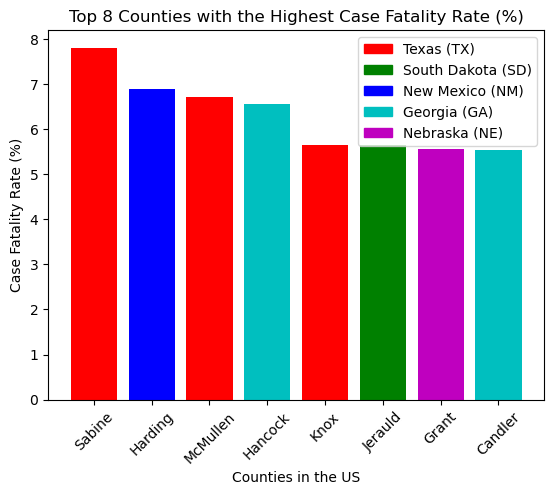

In [15]:
fig, top_counties_ax = plt.subplots()

top_counties = top_5_county_CFR_metric_df['county']
top_counties_cfr = top_5_county_CFR_metric_df['CFR']
bar_labels = top_5_county_CFR_metric_df['state']

# Creating the legend manually
red_patch = mpatches.Patch(color='red', label='Texas (TX)')
green_patch = mpatches.Patch(color='green', label='South Dakota (SD)')
blue_patch = mpatches.Patch(color='blue', label='New Mexico (NM)')
c_patch = mpatches.Patch(color='c', label='Georgia (GA)')
m_patch = mpatches.Patch(color='m', label='Nebraska (NE)')

patches = [red_patch, green_patch, blue_patch, c_patch, m_patch]   

bar_colors = ['red','blue','red','c','red','green','m', 'c', 'red', 'red']
     


top_counties_ax.bar(top_counties, top_counties_cfr, label=bar_labels, color=bar_colors)

top_counties_ax.set_ylabel('Case Fatality Rate (%)')
top_counties_ax.set_xlabel('Counties in the US')
top_counties_ax.set_title('Top 8 Counties with the Highest Case Fatality Rate (%)')
top_counties_ax.legend(handles=patches)
plt.xticks(rotation = 45)
bbox_inches='tight'
plt.savefig('images\Top 8 Counties with the Highest Case Fatality Rate (%).png')
plt.show()

In [16]:
bottom_5_county_CFR_metric_df = county_CFR_metric_df.sort_values('CFR', ascending=True).head(8)
bottom_5_county_CFR_metric_df

,date,county,state,fips,cases,deaths,CFR
1182190,2021-12-31,Aleutians West Census Area,AK,2016,951,1.0,0.105152
1182204,2021-12-31,Nome Census Area,AK,2180,2381,3.0,0.125997
1182417,2021-12-31,Pitkin,CO,8097,4161,6.0,0.144196
1182402,2021-12-31,Lake,CO,8065,1275,2.0,0.156863
1182427,2021-12-31,Summit,CO,8117,7124,12.0,0.168445
1182193,2021-12-31,Bristol Bay plus Lake and Peninsula,AK,2997,560,1.0,0.178571
1182335,2021-12-31,Mono,CA,6051,2122,4.0,0.188501
1184851,2021-12-31,Hartley,TX,48205,1000,2.0,0.200000


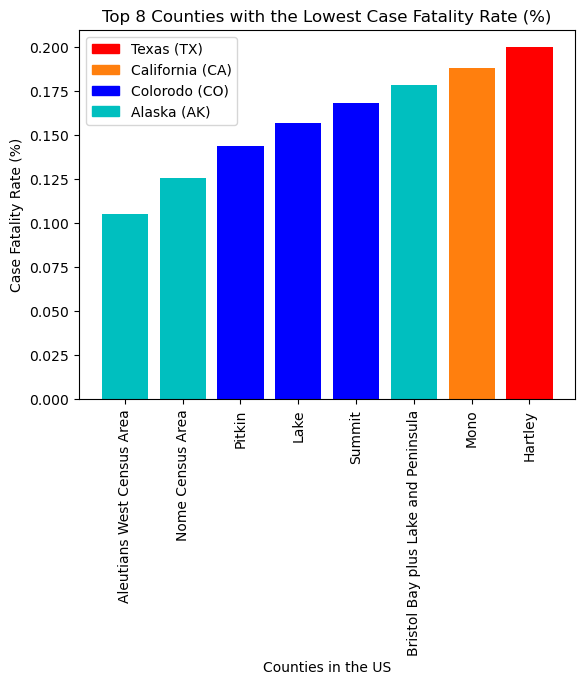

In [17]:
fig, bottom_counties_ax = plt.subplots()

bottom_counties = bottom_5_county_CFR_metric_df['county']
bottom_counties_cfr = bottom_5_county_CFR_metric_df['CFR']
bottom_bar_labels = bottom_5_county_CFR_metric_df['state']

# Creating the legend manually
red_patch = mpatches.Patch(color='red', label='Texas (TX)')
orange_patch = mpatches.Patch(color='tab:orange', label='California (CA)')
blue_patch = mpatches.Patch(color='blue', label='Colorodo (CO)')
c_patch = mpatches.Patch(color='c', label='Alaska (AK)')

bottom_patches = [red_patch, orange_patch, blue_patch, c_patch]   

bottom_bar_colors = ['c','c','blue','blue','blue','c','tab:orange','red']
     


bottom_counties_ax.bar(bottom_counties, bottom_counties_cfr, label=bottom_bar_labels, color=bottom_bar_colors)

bottom_counties_ax.set_ylabel('Case Fatality Rate (%)')
bottom_counties_ax.set_xlabel('Counties in the US')
bottom_counties_ax.set_title('Top 8 Counties with the Lowest Case Fatality Rate (%)')
bottom_counties_ax.legend(handles=bottom_patches)
plt.xticks(rotation = 90)
bbox_inches='tight'
plt.savefig('images\Top 8 Counties with the Lowest Case Fatality Rate (%).png')

plt.show()

### Case Fatality Rate vs Average Income in Different States

In [18]:
cleaned_averageIncome_df.iloc[:,4] = (cleaned_averageIncome_df.iloc[:,4].replace(',','', regex=True)).values.astype(int)
cleaned_averageIncome_df

,"County, State",fips,TimePeriod,CL_UNIT,DataValue
0,"Autauga, AL",1001,2021,Dollars,48347
1,"Baldwin, AL",1003,2021,Dollars,54659
2,"Barbour, AL",1005,2021,Dollars,40428
3,"Bibb, AL",1007,2021,Dollars,36892
4,"Blount, AL",1009,2021,Dollars,42634
...,...,...,...,...,...
3135,"Sweetwater, WY",56037,2021,Dollars,56934
3136,"Teton, WY",56039,2021,Dollars,318297
3137,"Uinta, WY",56041,2021,Dollars,44157
3138,"Washakie, WY",56043,2021,Dollars,60235


In [19]:
income_CFR_county_state_df = cleaned_COVID19_metrics_df.merge(cleaned_averageIncome_df, how='left', on='fips').dropna()
income_CFR_county_state_df['CFR'] = (income_CFR_county_state_df['deaths']) / (income_CFR_county_state_df['cases'])*100
income_CFR_county_state_df

,date,county,state,fips,cases,deaths,"County, State",TimePeriod,CL_UNIT,DataValue,CFR
0,2021-12-31,Autauga,AL,1001,11018,160.0,"Autauga, AL",2021.0,Dollars,48347.0,1.452169
1,2021-12-31,Baldwin,AL,1003,39911,593.0,"Baldwin, AL",2021.0,Dollars,54659.0,1.485806
2,2021-12-31,Barbour,AL,1005,3860,81.0,"Barbour, AL",2021.0,Dollars,40428.0,2.098446
3,2021-12-31,Bibb,AL,1007,4533,95.0,"Bibb, AL",2021.0,Dollars,36892.0,2.095742
4,2021-12-31,Blount,AL,1009,11256,198.0,"Blount, AL",2021.0,Dollars,42634.0,1.759062
...,...,...,...,...,...,...,...,...,...,...,...
3167,2021-12-31,Sweetwater,WY,56037,8320,107.0,"Sweetwater, WY",2021.0,Dollars,56934.0,1.286058
3168,2021-12-31,Teton,WY,56039,5950,14.0,"Teton, WY",2021.0,Dollars,318297.0,0.235294
3169,2021-12-31,Uinta,WY,56041,4154,31.0,"Uinta, WY",2021.0,Dollars,44157.0,0.746269
3170,2021-12-31,Washakie,WY,56043,1879,37.0,"Washakie, WY",2021.0,Dollars,60235.0,1.969133


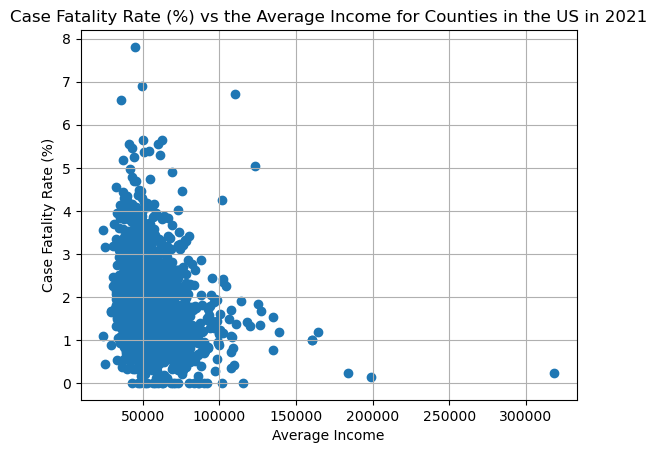

In [20]:
# Plotting CFR against avg income
x_vals = income_CFR_county_state_df['DataValue']
y_vals = income_CFR_county_state_df['CFR']

plt.scatter(x_vals, y_vals)
plt.title('Case Fatality Rate (%) vs the Average Income for Counties in the US in 2021')
plt.xlabel('Average Income')
plt.ylabel('Case Fatality Rate (%)')
plt.grid()
plt.savefig('images\Case Fatality Rate (%) vs the Average Income for Counties in the US in 2021.png')
plt.show()

In [21]:
county_CFR_income_correlation = sp.stats.pearsonr(x_vals,y_vals)
print(f"The correlation between both factors is {round(county_CFR_income_correlation[0],2)}")

The correlation between both factors is -0.25


In [22]:
# Use pandas to give quartile calculations for average income
quartiles = income_CFR_county_state_df['DataValue'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of average income is: {lowerq}")
print(f"The upper quartile of average income is: {upperq}")
print(f"The interquartile range of average income is: {iqr}")
print(f"The the median of average income is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Income values below {lower_bound} could be outliers.")
print(f"Income values above {upper_bound} could be outliers.")

The lower quartile of average income is: 44656.0
The upper quartile of average income is: 58154.0
The interquartile range of average income is: 13498.0
The the median of average income is: 50409.0 
Income values below 24409.0 could be outliers.
Income values above 78401.0 could be outliers.


In [23]:
county_income_outliers_removed_df = income_CFR_county_state_df[(income_CFR_county_state_df['DataValue'] > lower_bound) & (income_CFR_county_state_df['DataValue'] < upper_bound)]

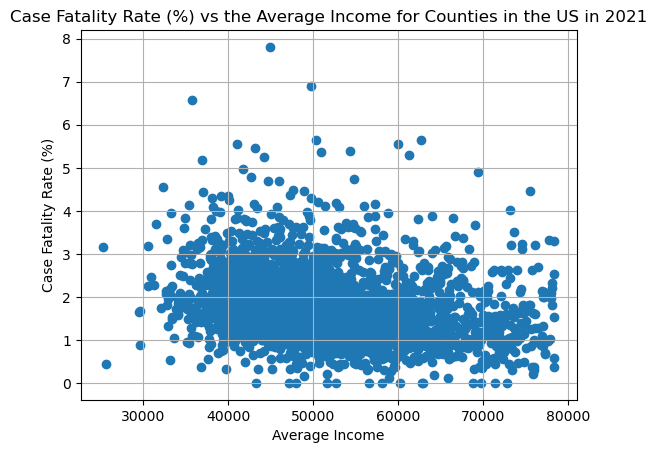

In [24]:
# Plotting CFR against avg income after removing outliers
x_vals = county_income_outliers_removed_df['DataValue']
y_vals = county_income_outliers_removed_df['CFR']

plt.scatter(x_vals, y_vals)
plt.title('Case Fatality Rate (%) vs the Average Income for Counties in the US in 2021')
plt.xlabel('Average Income')
plt.ylabel('Case Fatality Rate (%)')
plt.grid()
plt.savefig('images\Case Fatality Rate (%) vs the Average Income for Counties in the US in 2021 outliers removed.png')
plt.show()